In this project, we'll see how outliers affect the linear regression's best fit line and see how regularization of the hyperparameters can solve the outliers issue. Objective here is to visualize best fit linear regression line for different hyperparameter, outliers scenarios.

In [4]:
# required imports
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

from sklearn.linear_model import SGDRegressor

Sample ellipse 

In [5]:
def angles_in_ellipse(num,a,b):
    assert(num > 0)
    assert(a < b)
    angles = 2 * np.pi * np.arange(num) / num
    if a != b:
        e = (1.0 - a ** 2.0 / b ** 2.0) ** 0.5
        tot_size = sp.special.ellipeinc(2.0 * np.pi, e)
        arc_size = tot_size / num
        arcs = np.arange(num) * arc_size
        res = sp.optimize.root(
            lambda x: (sp.special.ellipeinc(x, e) - arcs), angles)
        angles = res.x 
    return angles

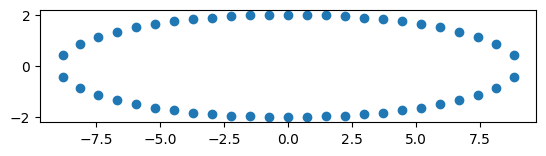

In [6]:
a = 2
b = 9
n = 50

phi = angles_in_ellipse(n, a, b)
e = (1.0 - a ** 2.0 / b ** 2.0) ** 0.5
arcs = sp.special.ellipeinc(phi, e)

fig = plt.figure()
ax = fig.gca()
ax.axes.set_aspect('equal')
ax.scatter(b * np.sin(phi), a * np.cos(phi))
plt.show()

<h1>Linear Regression best fit line</h1>

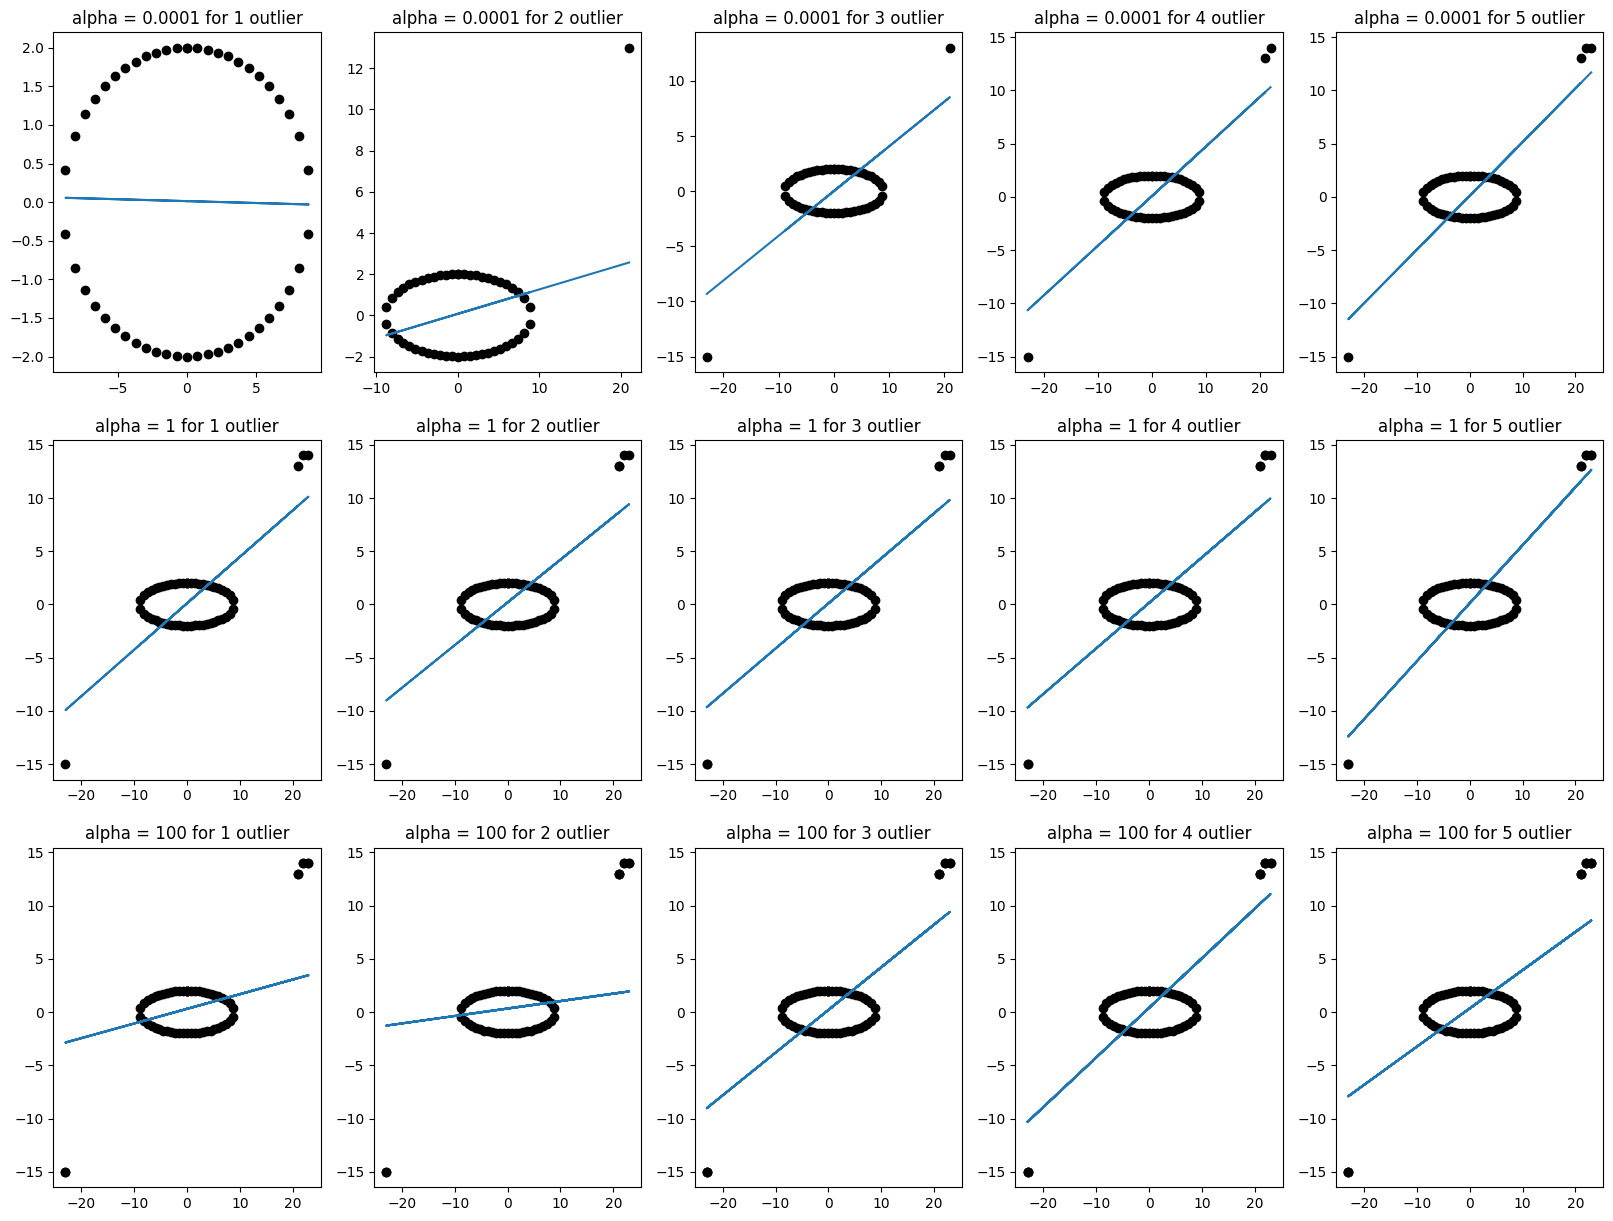

In [8]:
# Use of SGDRegressor() is done below for regression analysis
# regularizers are the alpha values
regularizers = [0.0001, 1, 100]

plt.figure(figsize=(20,15))

# initializing subplot to one which will increment/increase in the below given for loop(till 15 subplots)
subplot_cnt = 1

# hardcoded 5 outlier points
outliers = [(0,2),(21, 13), (-23, -15), (22,14), (23, 14)]

# created regression dataset (X,Y), which forms an ellipse if plotted.
X = b * np.sin(phi)
Y = a * np.cos(phi)

for regu in regularizers:
  
  for idx,i in enumerate(outliers):
    
    # adding first index value of outliers tuple to X data (in simple term, adding outlier to the data) e.g. from (0,2) adding 0 to X array
    X = np.append(X, i[0])
    
    # adding second index value of outliers tuple to Y data (in simple term, adding outlier to the data) e.g. from (0,2) adding 2 to Y array
    Y = np.append(Y, i[1])

    # loss = 'squared_error' means Linear Regression loss
    # alpha = regu means passing regularizer/alpha value from [0.0001, 1, 100]
    # eta0 = 0.001 means learning rate is initialized to 0.001 and learning_rate='constant' means keeping the learning rate constant throughout the training
    clf = SGDRegressor(loss='squared_error' , alpha= regu, eta0=0.001, learning_rate='constant',random_state=0)

    # plotting subplots in which 3 is number of rows of subplots, 5 is number of columns of subplots, subplot_cnt is the actual subplot itself
    plt.subplot(3, 5, subplot_cnt)

    # incrementing the subplot count(till 15)
    subplot_cnt += 1

    # training the classifier and predicting on train data(prediction is done to obtain the hyperplane)
    # to fit() the data, we need 2D array of X data elements, so we will generate one more dimension for X as X has only one dimension(50 rows)
    # to do that, we will use reshape(-1,1) which will give extra dimension i.e. 1 column so shape of X becomes (50,1)
    # reference - https://www.youtube.com/watch?v=3wi0lJPfLUY
    clf.fit(X.reshape(-1,1), Y)

    # predict the labels of the data(here labels are Y values) on the basis of the trained/fitted model
    Y_predict =clf.predict(X.reshape(-1,1))

    # plotting the data points and hyperplanes
    plt.scatter(X, Y, color='black')
    plt.plot(X,Y_predict)

    # titles for every subplot(mentioning regularizer values(alpha values) and number of outliers)
    plt.title('alpha = {0} for {1} outlier'.format(str(regu), str(idx+1)))

plt.show()

# Observation:


*   **When alpha = 0.0001**<br>
As alpha value is very small, the regression line tends to outliers as number of outliers increases. For 1 or 2 outliers, the line is far away from them. But as the number of outliers increase, the line shifts towards them, considering them non-outlier points.
*   **When alpha = 1** <br>
Even after increasing alpha from 0.0001 to 1, exact same observation is seen for the line which is seen for alpha = 0.0001

*  **When alpha = 100**<br>
As the alpha is set to 100, the regression line becomes more robust to outliers(line remains far away from outliers). As the outliers increase, it still affects the line but comparably less (compared to less values of alpha).



